# Concert feedback prediction


# 1. Data Preprocessing

In [ ]:
import tensorflow as tf 
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# mounting google drive for reading files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/concert_feedback_classification/feedback_data_final.csv')
x = data[data.columns[:-1]]
y = data['target']

In [ ]:
x_train_n, x_test_n, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 0)


# 2. Baseline Methods for Classification

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_clf = LogisticRegression() 
log_clf.fit(x_train_n, y_train)


y_test_pred = log_clf.predict(x_test_n)
test_acc = accuracy_score(y_test, y_test_pred)
y_train_pred = log_clf.predict(x_train_n)
train_acc = accuracy_score(y_train, y_train_pred)

print("The accuracy of the model on train data is ", train_acc)
print("The accuracy of the model on test data is ", test_acc)


The accuracy of the model on train data is  0.8066666666666666
The accuracy of the model on test data is  0.9


In [ ]:
log_clf.predict(x_test_n.iloc[0:1,:].values)

array([0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.89      0.97      0.93        34
           1       0.92      0.75      0.83        16

    accuracy                           0.90        50
   macro avg       0.91      0.86      0.88        50
weighted avg       0.90      0.90      0.90        50



In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_test_pred)

print('Confusion matrix : \n', cnf_matrix)

Confusion matrix : 
 [[33  1]
 [ 4 12]]


In [ ]:
# saving the trained model and loading it for inference
import pickle
file_name = "/content/drive/MyDrive/Colab Notebooks/concert_feedback_classification/logistic_reg_qa.pkl"

# save
pickle.dump(log_clf, open(file_name, "wb"))

# load
logistic_model_loaded = pickle.load(open(file_name, "rb"))
# y_test_pred = logistic_model_loaded.predict(x_test_n)


# 3. XGBoost for Classification

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
log_clf = XGBClassifier() 
log_clf.fit(x_train_n, y_train)

y_test_pred = log_clf.predict(x_test_n)
test_acc = accuracy_score(y_test, y_test_pred)
y_train_pred = log_clf.predict(x_train_n)
train_acc = accuracy_score(y_train, y_train_pred)

print("The accuracy of the model on train data is ", train_acc)
print("The accuracy of the model on test data is ", test_acc)


The accuracy of the model on train data is  0.9933333333333333
The accuracy of the model on test data is  0.88


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.91      0.91      0.91        34
           1       0.81      0.81      0.81        16

    accuracy                           0.88        50
   macro avg       0.86      0.86      0.86        50
weighted avg       0.88      0.88      0.88        50



In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_test_pred)

print('Confusion matrix : \n', cnf_matrix)

Confusion matrix : 
 [[31  3]
 [ 3 13]]


In [ ]:
# sample prediction on one test sample
log_clf.predict(x_test_n.iloc[0:1,:])

array([0])

In [ ]:
 # creating test input for prediction on new data
 test_input = pd.DataFrame({'Q1': [1],'Q2':[1] ,'Q3': [1], 'Q4':[0] , 'Q5':[0] })

In [ ]:
# saving the trained model and loading it for inference
# import pickle
# file_name = "/content/drive/MyDrive/Colab Notebooks/concert_feedback_classification/xgb_reg.pkl"

# # save
# pickle.dump(log_clf, open(file_name, "wb"))

# # load
# xgb_model_loaded = pickle.load(open(file_name, "rb"))


In [ ]:
# prediction on the test input 
# xgb_model_loaded.predict(test_input)

# 4. Building a Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam

def nn_model():
  model = Sequential()

  model.add(Dense(128, input_shape=(5,), activation = 'relu', kernel_initializer= 'lecun_normal'))
  # model.add(Dropout(0.1))

  model.add(Dense(64, activation = 'relu'))
  # model.add(Dropout(0.1))

  model.add(Dense(32, activation = 'relu'))
  # model.add(Dropout(0.1))

  model.add(Dense(16, activation = 'relu'))


  model.add(Dense(1, activation = 'sigmoid'))

  model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
  return model


In [ ]:
# simple early stopping
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
out_path = '/content/drive/MyDrive/Colab Notebooks/concert_feedback_classification/' + 'best_model.h5'
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=70)
mc = ModelCheckpoint(filepath= out_path, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

baseline_nn = nn_model()
# fit model
history = baseline_nn.fit(x_train_n, y_train, batch_size=8, epochs=50, validation_split = 0.2, verbose=2, shuffle=True, callbacks=[es, mc])


Epoch 1/50
15/15 - 1s - loss: 0.6627 - accuracy: 0.6167 - val_loss: 0.5868 - val_accuracy: 0.7000

Epoch 00001: val_accuracy improved from -inf to 0.70000, saving model to /content/drive/MyDrive/Colab Notebooks/concert_feedback_classification/best_model.h5
Epoch 2/50
15/15 - 0s - loss: 0.4839 - accuracy: 0.7917 - val_loss: 0.5300 - val_accuracy: 0.8000

Epoch 00002: val_accuracy improved from 0.70000 to 0.80000, saving model to /content/drive/MyDrive/Colab Notebooks/concert_feedback_classification/best_model.h5
Epoch 3/50
15/15 - 0s - loss: 0.4231 - accuracy: 0.8583 - val_loss: 0.4929 - val_accuracy: 0.8333

Epoch 00003: val_accuracy improved from 0.80000 to 0.83333, saving model to /content/drive/MyDrive/Colab Notebooks/concert_feedback_classification/best_model.h5
Epoch 4/50
15/15 - 0s - loss: 0.3558 - accuracy: 0.8833 - val_loss: 0.5031 - val_accuracy: 0.8667

Epoch 00004: val_accuracy improved from 0.83333 to 0.86667, saving model to /content/drive/MyDrive/Colab Notebooks/concert_f

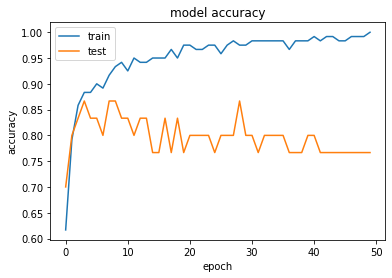

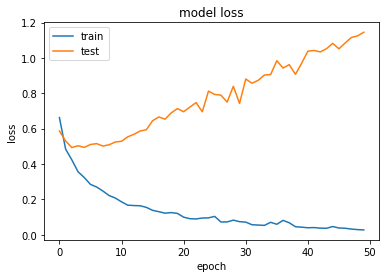

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from keras.models import load_model
baseline_nn = load_model(out_path)

y_nn_pred = baseline_nn.predict_classes(x_test_n)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_nn_pred))

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_nn_pred)

print('Confusion matrix : \n', cnf_matrix)

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        34
           1       0.74      0.88      0.80        16

    accuracy                           0.86        50
   macro avg       0.84      0.86      0.85        50
weighted avg       0.87      0.86      0.86        50

Confusion matrix : 
 [[29  5]
 [ 2 14]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
